In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading csv file 

df= pd.read_csv('/kaggle/input/premier-league-season-2024/PremierLeagueSeason2024.csv')
df.head()

,team,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
0,Manchester City,179,66,55,12,9,177,113,1
1,Liverpool,154,83,44,19,13,151,71,2
2,Arsenal,146,68,46,12,18,150,78,3
3,Manchester United,130,102,39,17,20,134,28,4
4,Chelsea,135,99,37,19,20,130,36,5


In [3]:
# Dropping the names column

df.drop(columns='team',inplace=True)

In [4]:
# To check for Null Values

df.isnull().sum()

goals_scored       0
goals_conceded     0
wins               0
draws              0
losses             0
points             0
goal_difference    0
rank               0
dtype: int64

In [5]:
# finding standard deviation of all the columns 

df.std()

goals_scored       41.041778
goals_conceded     29.057539
wins               13.931444
draws               5.358861
losses             10.794440
points             44.184704
goal_difference    47.120567
rank                7.071068
dtype: float64

In [6]:
# finding mean, median, range of the different columns 
df.describe()

,goals_scored,goals_conceded,wins,draws,losses,points,goal_difference,rank
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,94.583333,94.583333,24.791667,13.750000,24.791667,88.125000,0.000000,12.500000
std,41.041778,29.057539,13.931444,5.358861,10.794440,44.184704,47.120567,7.071068
min,35.000000,50.000000,5.000000,5.000000,9.000000,26.000000,-112.000000,1.000000
25%,55.750000,67.750000,12.750000,9.000000,18.750000,46.750000,-27.250000,6.750000
50%,86.500000,99.000000,23.000000,14.500000,23.000000,90.000000,-10.500000,12.500000
75%,131.000000,114.750000,36.250000,18.000000,29.500000,124.250000,25.000000,18.250000
max,179.000000,167.000000,55.000000,26.000000,57.000000,177.000000,113.000000,24.000000


In [7]:
# creating list of all the columns

columns = list(df.columns)

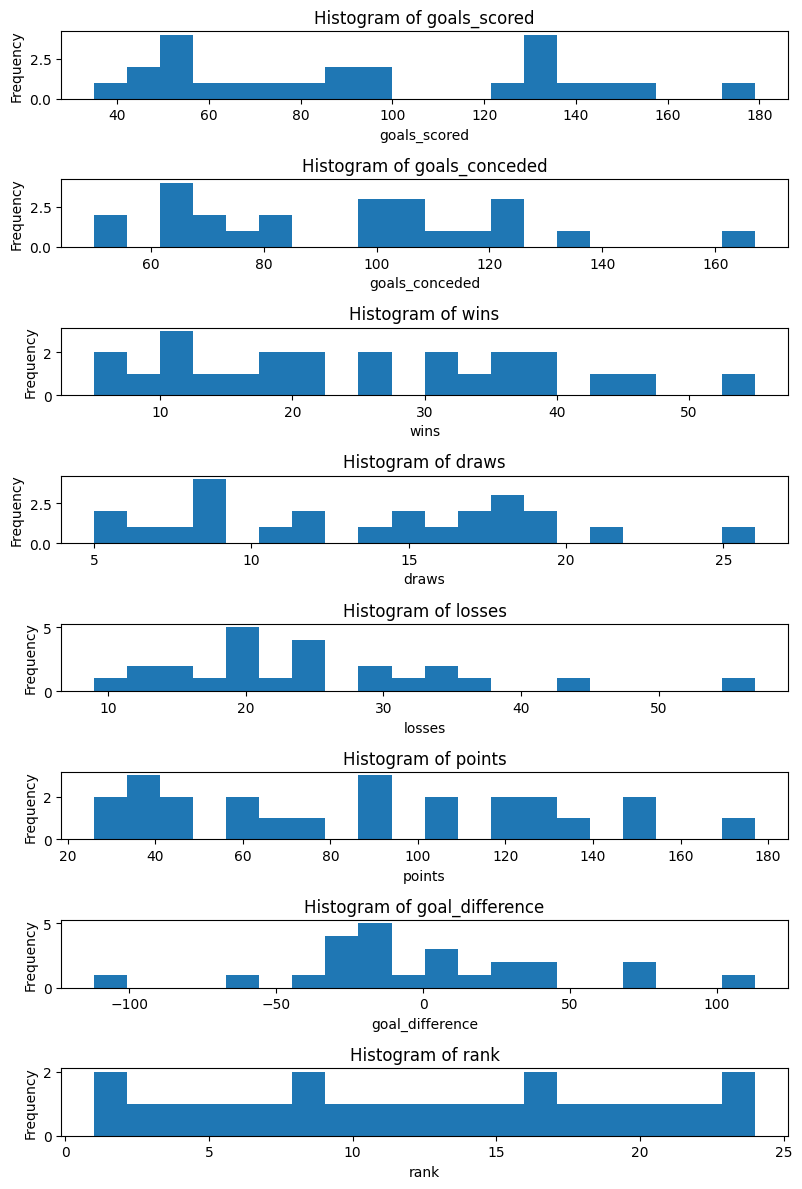

In [8]:
# preparing histograms for univariate analysis

fig, axes = plt.subplots(len(columns), 1, figsize=(8, 12))
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=20)
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

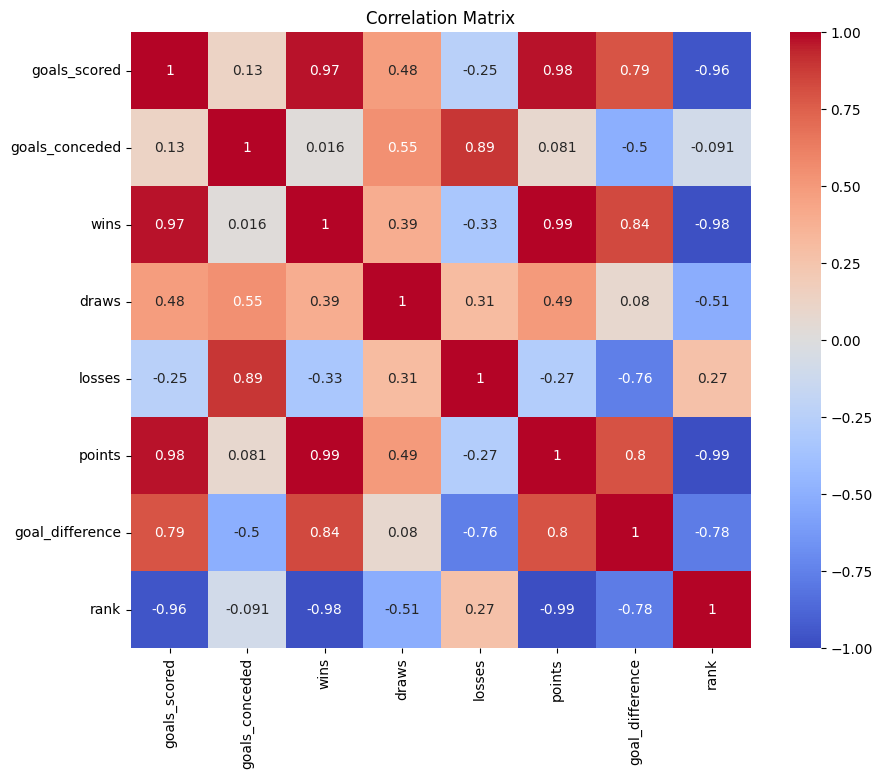

In [9]:
# preparing correlation matrix for bivariate analysis

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

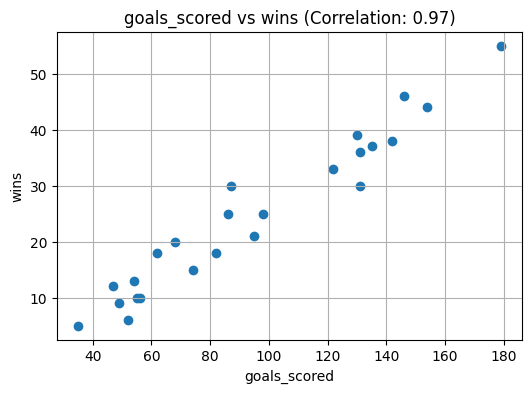

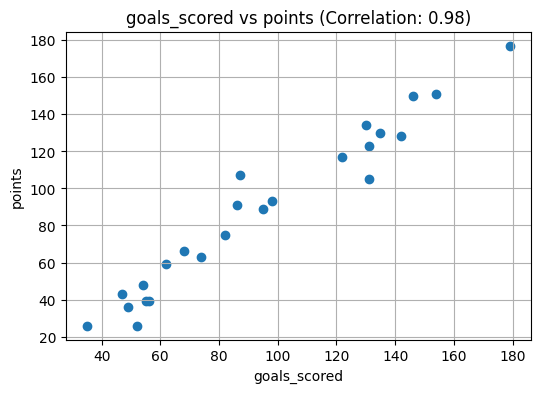

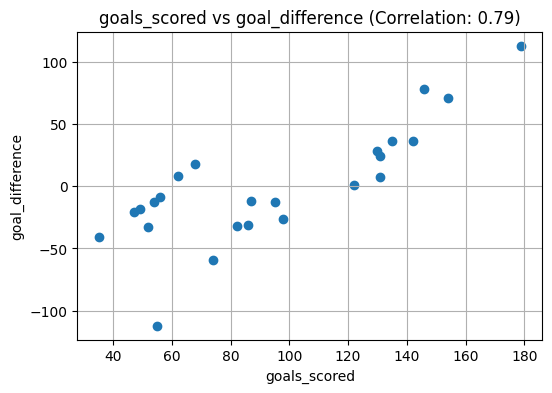

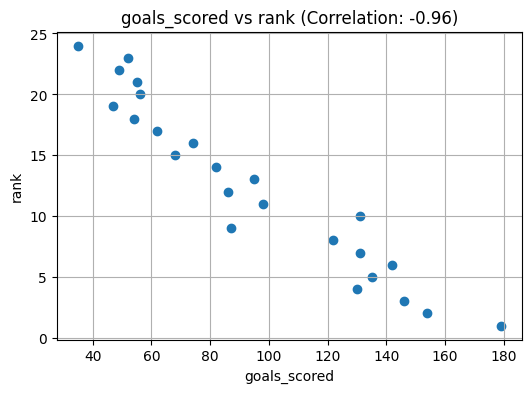

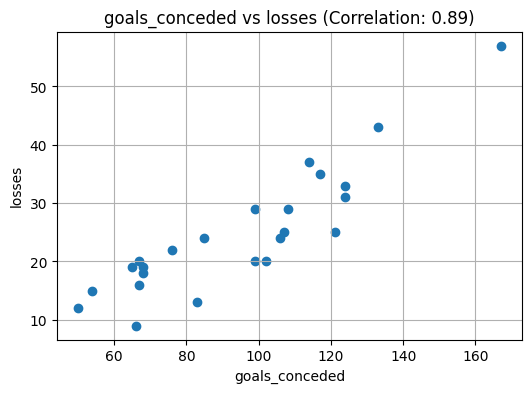

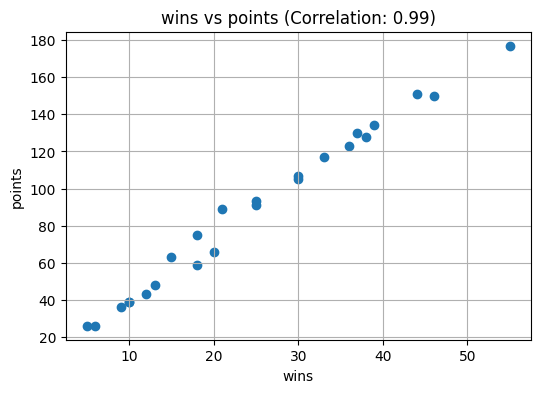

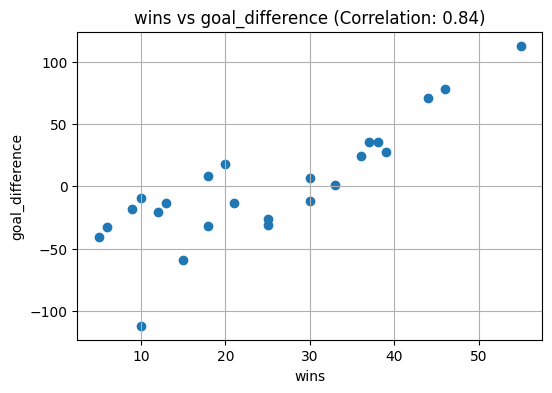

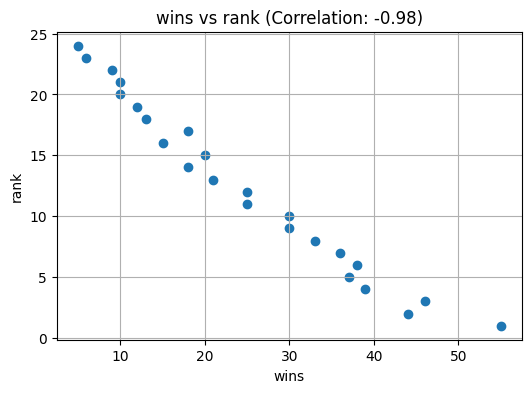

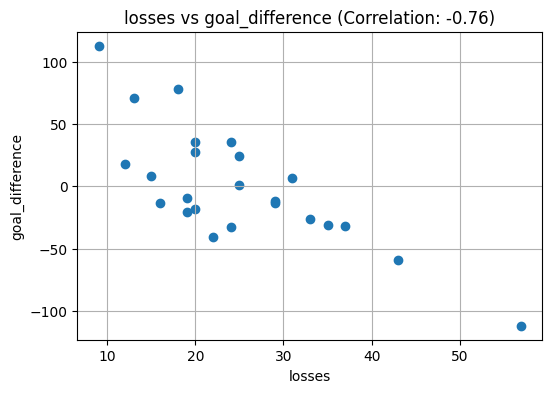

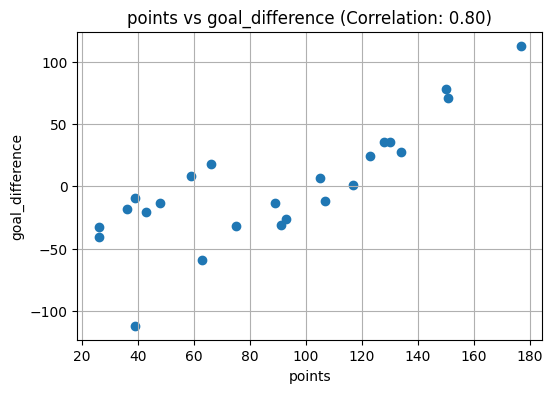

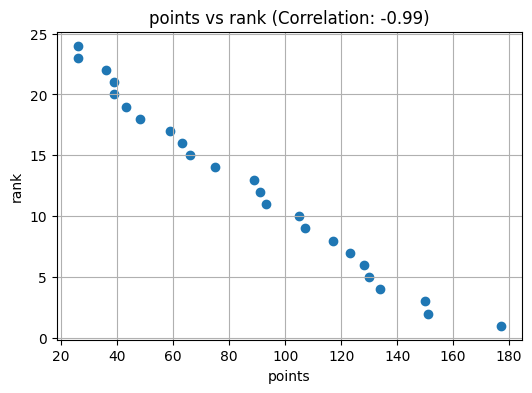

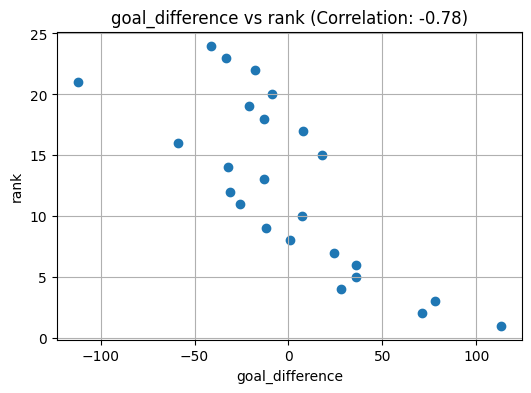

In [10]:
correlation_matrix = df.corr()

# Set a threshold for correlation factor 
threshold = 0.7

for i in range(len(columns)):
    for j in range(i + 1, len(columns)):  
        corr_value = correlation_matrix.iloc[i, j] 
        if abs(corr_value) > threshold:
            col_x = columns[i]
            col_y = columns[j]
            
            # Plotting scatterplot for all pairs whose correlation factor is abpve threshold 
            plt.figure(figsize=(6, 4))
            plt.scatter(df[col_x], df[col_y])
            plt.title(f'{col_x} vs {col_y} (Correlation: {corr_value:.2f})')
            plt.xlabel(col_x)
            plt.ylabel(col_y)
            plt.grid(True)
            plt.show()